הקישור לשיתוף:  
https://drive.google.com/file/d/1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye/view?usp=drive_link

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
# הורדת קובץ ה-ZIP מגוגל דרייב
zip_id = "1skeGPanoAI7ZPOf7x_YSvWwMM-Ye2mye"
!gdown --id {zip_id} -O dataset.zip

# חילוץ הקבצים
!unzip dataset.zip -d dataset
print("הללויה הקבצים כאן")

In [3]:
# נתיבי התיקיות
train_path = "dataset/train"
test_path = "dataset/test"

In [4]:
# טעינת התמונות ישירות מהתיקיות
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(150, 150),
    batch_size=32
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(150, 150),
    batch_size=32
)

Found 1502 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [14]:
class_names = train_dataset.class_names #תרא איזה קסם- הוא קרא את זה משמות התיקיות
class_names

['nachos', 'waffles']

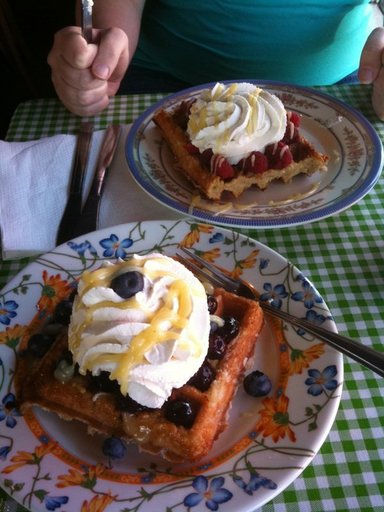

In [13]:
tf.keras.preprocessing.image.load_img('dataset/train/waffles/100242.jpg')


In [15]:
tf.keras.preprocessing.image.load_img('dataset/train/waffles/100242.jpg').size

(384, 512)

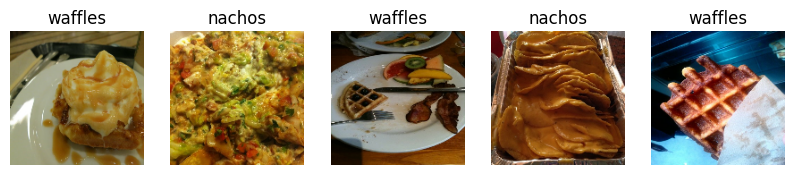

In [16]:
#בואו נראה שהוא טען את התמונות כמו שצריך
for images, labels in train_dataset.take(1):  # לקחת קבוצה אחת (רנדומלית) של תמונות
    plt.figure(figsize=(10, 5))
    for i in range(5):  # הצגת 5 תמונות
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # הצגת תמונה בפורמט של תמונה
        plt.title(class_names[int(labels[i])])  # שם הקטגוריה
        plt.axis("off")  # ביטול הצירים
    plt.show()

In [21]:
# בנו מודל למיון התמונות
# חד פעמים שכבה ראשונה במודל צריכה להיות:
# tf.keras.layers.Rescaling(1./255),  # שכבת נורמליזציה
# בחרו פונקציית אקטיבציה בשכבת הפלט בתבונה
model = tf.keras.Sequential([
    #rescling
    tf.keras.layers.Rescaling(1./255),
    #cnn+maxpool 1
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #cnn+maxpool 2
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #fc/dense
    tf.keras.layers.Dense(32, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    #outputlayer
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

In [39]:
# קומפילציה של המודל
#בחרו פונקציית הפסד בתבונה
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss =tf.keras.losses.BinaryCrossentropy(),
              metrics =['accuracy'])

In [40]:
# אימון המודל
# השתמשו בנתוני המבחן עבור סט הולידציה
history = model.fit(train_dataset,
                    epochs =10,
                    validation_data = test_dataset)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9325 - loss: 0.1693 - val_accuracy: 0.7100 - val_loss: 1.0200
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9728 - loss: 0.0739 - val_accuracy: 0.7160 - val_loss: 1.0645
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9816 - loss: 0.0440 - val_accuracy: 0.7280 - val_loss: 0.9416
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9827 - loss: 0.0525 - val_accuracy: 0.7160 - val_loss: 1.2726
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9879 - loss: 0.0464 - val_accuracy: 0.6880 - val_loss: 1.3529
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9843 - loss: 0.0484 - val_accuracy: 0.7160 - val_loss: 1.3165
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.7060 - val_loss: 1.3086
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9939 - loss: 0.0259 - val_accuracy: 0.7000 - v

אם נשאר זמן אפשר להוסיף גם את שני השלבים הבאים

In [41]:
# הערכת המודל
model.evaluate (test_dataset)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7477 - loss: 1.2470


[1.3970720767974854, 0.7200000286102295]

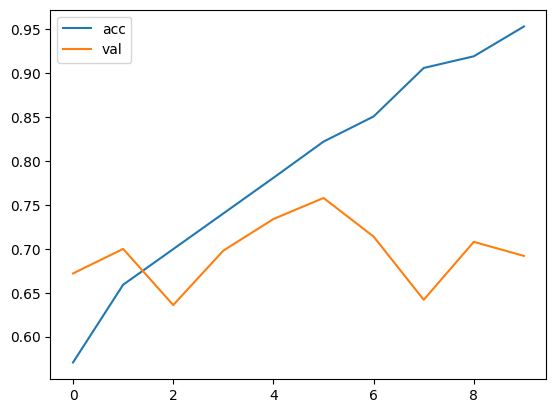

In [27]:
# הצגת גרף דיוק האימון
plt.plot(history.history['accuracy'],label ='acc')
plt.plot(history.history['val_accuracy'],label ='val')
plt.legend()
plt.show()

#Augmantation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [42]:
img_path='dataset/train/waffles/100242.jpg'

In [43]:
img = load_img(img_path)

In [45]:
img.size

(384, 512)

(-0.5, 383.5, 511.5, -0.5)

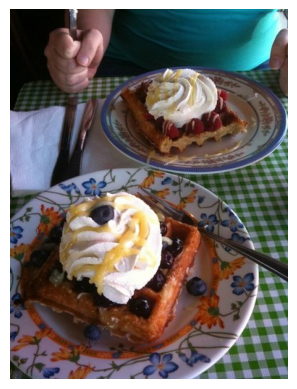

In [49]:
plt.imshow(img)
plt.axis("off")

In [51]:
#מחולל תמונות
datagen = ImageDataGenerator(
    rotation_range = 120, #סיבוב אקראי עד 120 מעלות #30
    width_shift_range = 0.2, #הזזת רוחב 20%
    height_shift_range = 0.2, # הזזה לגובה עד 20%
    shear_range = 0.5, # עיוות זוייתי #0.2
    zoom_range =0.5, #זום פנימה והחוצה # #0.2
    horizontal_flip= True, #היפוך אופקי
    fill_mode = 'nearest' #reflect # warp #constant, cval =0

)

In [52]:
x = img_to_array(img) #numpy array

In [55]:
import numpy as np

In [57]:
x = np.expand_dims(x, axis =0)

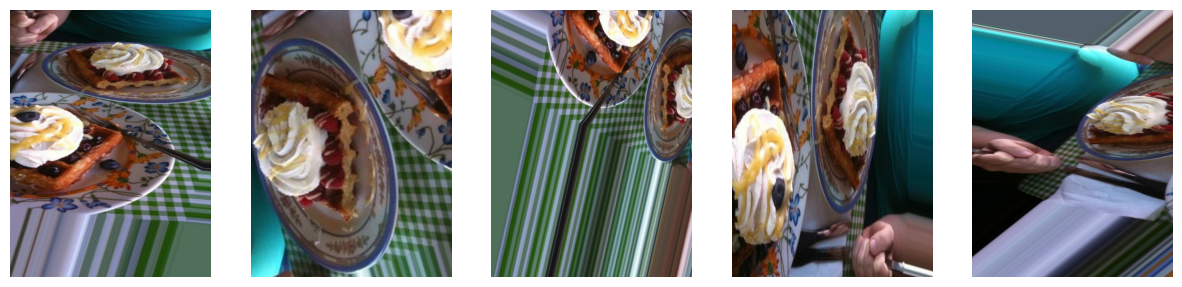

In [60]:
fig, ax = plt.subplots(1,5,  figsize=(15,5))
i=0
for batch in datagen.flow(x, batch_size =1):
  ax[i].imshow(array_to_img(batch[0])) #מציג תמונה אחרי שינוי
  ax[i].axis("off")
  i +=1
  if i==5 :
    break
plt.show()


שימוש במודל:

In [73]:
#מחולל תמונות
#אימון
train_datagen = ImageDataGenerator(
    rescale =1./255, #נירמול
    rotation_range = 40, #סיבוב אקראי עד 120 מעלות #30
    width_shift_range = 0.2, #הזזת רוחב 20%
    height_shift_range = 0.2, # הזזה לגובה עד 20%
    shear_range = 0.2, # עיוות זוייתי #0.2
    zoom_range =0.2, #זום פנימה והחוצה # #0.2
    horizontal_flip= True, #היפוך אופקי
    fill_mode = 'nearest' #reflect # warp #constant, cval =0

)

#נתונים לבדיקה
test_datagen = ImageDataGenerator(rescale =1./255) #נירמול

In [71]:
# נתיבי התיקיות
train_path = "dataset/train"
test_path = "dataset/test"

In [72]:
train_generator =train_datagen.flow_from_directory  (
    train_path,
    target_size  = (150,150),
    batch_size =32,
    class_mode = 'binary',
    seed =42
)
test_generator =test_datagen.flow_from_directory (
    test_path,
    target_size  = (150,150),
    batch_size =32,
    class_mode = 'binary',
    seed =42
)

Found 1502 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [67]:
model = tf.keras.Sequential([
    #rescling
    #tf.keras.layers.Rescaling(1./255),
    #cnn+maxpool 1
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #cnn+maxpool 2
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #fc/dense
    tf.keras.layers.Dense(32, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    #outputlayer
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

In [68]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss =tf.keras.losses.BinaryCrossentropy(),
              metrics =['accuracy'])

In [74]:
history = model.fit(train_generator,
                    epochs =10,
                    validation_data = test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.5376 - loss: 0.6978 - val_accuracy: 0.6220 - val_loss: 0.6347
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.5955 - loss: 0.6697 - val_accuracy: 0.6340 - val_loss: 0.6516
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.6054 - loss: 0.6683 - val_accuracy: 0.6240 - val_loss: 0.6302
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.6085 - loss: 0.6587 - val_accuracy: 0.6880 - val_loss: 0.5811
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.6201 - loss: 0.6306 - val_accuracy: 0.6480 - val_loss: 0.6415
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.6557 - loss: 0.6447 - val_accuracy: 0.6960 - val_loss: 0.5816
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.6791 - loss: 0.6053 - val_accuracy: 0.7120 - val_loss: 0.5672
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.6876 - loss: 0.5961 - val_accu